<a href="https://colab.research.google.com/github/emreaskinsoftware/netflix-data-visualization/blob/main/netflix_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bu kod, Colab'a dosya yüklemeniz için bir buton çıkarır
from google.colab import files

print("Lütfen bilgisayarınıza indirdiğiniz 'kaggle.json' dosyasını seçin:")
files.upload()

Lütfen bilgisayarınıza indirdiğiniz 'kaggle.json' dosyasını seçin:


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emreaskin","key":"2e2b160eb3d4114495adcbc0719f77f3"}'}

In [2]:
# Başındaki '!' işareti, bunun bir Python kodu değil,
# bir terminal (Linux) komutu olduğunu Colab'a söyler.

# 1. Kaggle için bir klasör oluştur
!mkdir -p ~/.kaggle

# 2. Yüklediğimiz 'kaggle.json' dosyasını o klasöre taşı
!cp kaggle.json ~/.kaggle/

# 3. Dosya izinlerini ayarla (Sadece sizin okuyabilmeniz için güvenlik ayarı)
!chmod 600 ~/.kaggle/kaggle.json

print("✓ Kaggle API kurulumu başarıyla tamamlandı.")

✓ Kaggle API kurulumu başarıyla tamamlandı.


In [3]:
# 1. Veri setini Kaggle'dan indir
!kaggle datasets download -d shivamb/netflix-shows

# 2. İndirilen dosya bir ZIP dosyasıdır. Onu açalım.
!unzip netflix-shows.zip

print("✓ Veri seti indirildi ve 'netflix_titles.csv' olarak klasöre açıldı.")

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 789MB/s]
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      
✓ Veri seti indirildi ve 'netflix_titles.csv' olarak klasöre açıldı.


In [4]:
# Gerekli kütüphaneleri 'import' ediyoruz
# (Colab'da bunlar zaten yüklüdür, sadece çağırmamız gerekir)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn için varsayılan bir tema belirleyelim (grafikler daha hoş görünür)
sns.set_theme(style="whitegrid")

# Veri setini yüklüyoruz.
try:
    # 'df' (DataFrame), verilerimizi tutan tablo için yaygın bir kısaltmadır.
    df = pd.read_csv('netflix_titles.csv')
    print("✓ Veri seti başarıyla DataFrame'e yüklendi.")
    print(f"Veri setinin boyutu (Satır, Sütun): {df.shape}")
except FileNotFoundError:
    print("Hata: 'netflix_titles.csv' dosyası bulunamadı.")

# --- İLK ANALİZ ---

# Verinin yapısını anlamak için ilk 5 satıra bakalım
print("\n--- Veri Setinden İlk 5 Satır (head) ---")
print(df.head())

# Veri setinin genel özetine (sütun tipleri, boş değerler) bakalım
print("\n--- Veri Seti Bilgileri (info) ---")
df.info()

# Sayısal sütunların istatistiksel özetine bakalım (ortalama, min, max vb.)
print("\n--- Sayısal Veri Özeti (describe) ---")
print(df.describe())

✓ Veri seti başarıyla DataFrame'e yüklendi.
Veri setinin boyutu (Satır, Sütun): (8807, 12)

--- Veri Setinden İlk 5 Satır (head) ---
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  Septemb

In [6]:
# 1. 'director', 'cast', ve 'country' sütunlarındaki boşlukları doldur
# .fillna() fonksiyonu boş değerleri doldurur
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

print("✓ 'director', 'cast', 'country' sütunlarındaki eksik veriler 'Unknown' ile dolduruldu.")

✓ 'director', 'cast', 'country' sütunlarındaki eksik veriler 'Unknown' ile dolduruldu.


In [7]:
# 2. Az sayıda eksik veri içeren satırları sil
# 'subset' ile hangi sütunlara bakacağını söylüyoruz
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

print("✓ 'date_added', 'rating', 'duration' sütunlarında eksik veri olan satırlar silindi.")

✓ 'date_added', 'rating', 'duration' sütunlarında eksik veri olan satırlar silindi.


In [9]:
# --- Adım 2.3 (GÜNCELLENMİŞ - Boşluk Temizliği) ---
# Önce .str.strip() ile baştaki ve sondaki boşlukları temizle,
# SONRA 'datetime' tipine çevir.
try:
    df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
    print("✓ 'date_added' sütunundaki boşluklar temizlendi ve tip 'datetime' olarak güncellendi.")

except Exception as e:
    print(f"Hata! Dönüşüm sırasında bir sorun oluştu: {e}")
    print("Veri tipini kontrol edin, belki başka kirli veri vardır.")

✓ 'date_added' sütunundaki boşluklar temizlendi ve tip 'datetime' olarak güncellendi.


In [10]:
# 'date_added' sütunundan yeni özellikler türetelim
# .dt.year özelliği bize yılı verir
df['added_year'] = df['date_added'].dt.year
# .dt.month özelliği bize ayı verir
df['added_month'] = df['date_added'].dt.month

print("✓ 'added_year' ve 'added_month' adında iki yeni sütun oluşturuldu.")

✓ 'added_year' ve 'added_month' adında iki yeni sütun oluşturuldu.


In [11]:
# --- TEMİZLİK SONRASI KONTROL ---
print("\n--- Temizlik Sonrası Veri Seti Bilgileri ---")
df.info()


--- Temizlik Sonrası Veri Seti Bilgileri ---
<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  added_year    8790 non-null   int32         
 13  added_month   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), objec

/tmp/ipython-input-3194373189.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='type', palette='pastel')


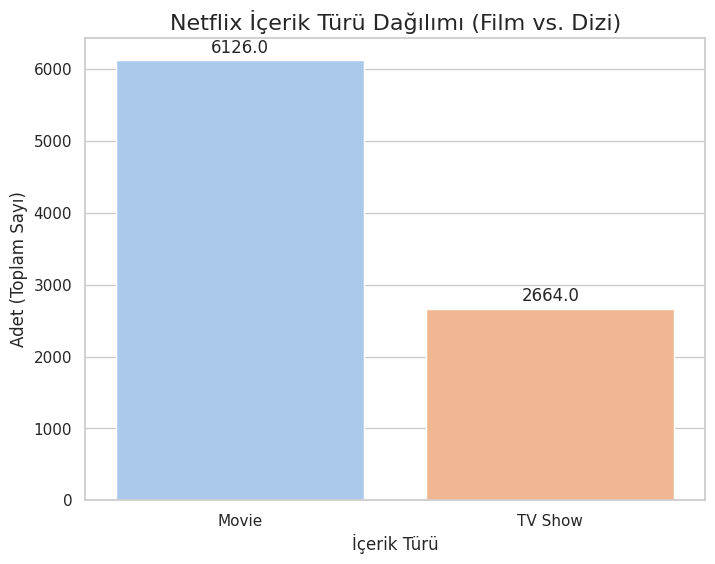

In [12]:
# --- Soru 1: İçerik Türü Dağılımı ---

# Grafik boyutunu ayarlayalım (genişlik, yükseklik)
plt.figure(figsize=(8, 6))

# Seaborn kullanarak bir sayım grafiği (countplot) çizdiriyoruz
# data=df -> Veri setimizi
# x='type' -> X ekseninde 'type' sütunu olsun
ax = sns.countplot(data=df, x='type', palette='pastel')

# Profesyonel dokunuş: Başlık ve etiket ekleme
plt.title('Netflix İçerik Türü Dağılımı (Film vs. Dizi)', fontsize=16)
plt.xlabel('İçerik Türü', fontsize=12)
plt.ylabel('Adet (Toplam Sayı)', fontsize=12)

# Profesyonel dokunuş 2: Barların üzerine sayıları ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Grafiği göster
plt.show()

/tmp/ipython-input-3785851817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='added_year', palette='coolwarm')


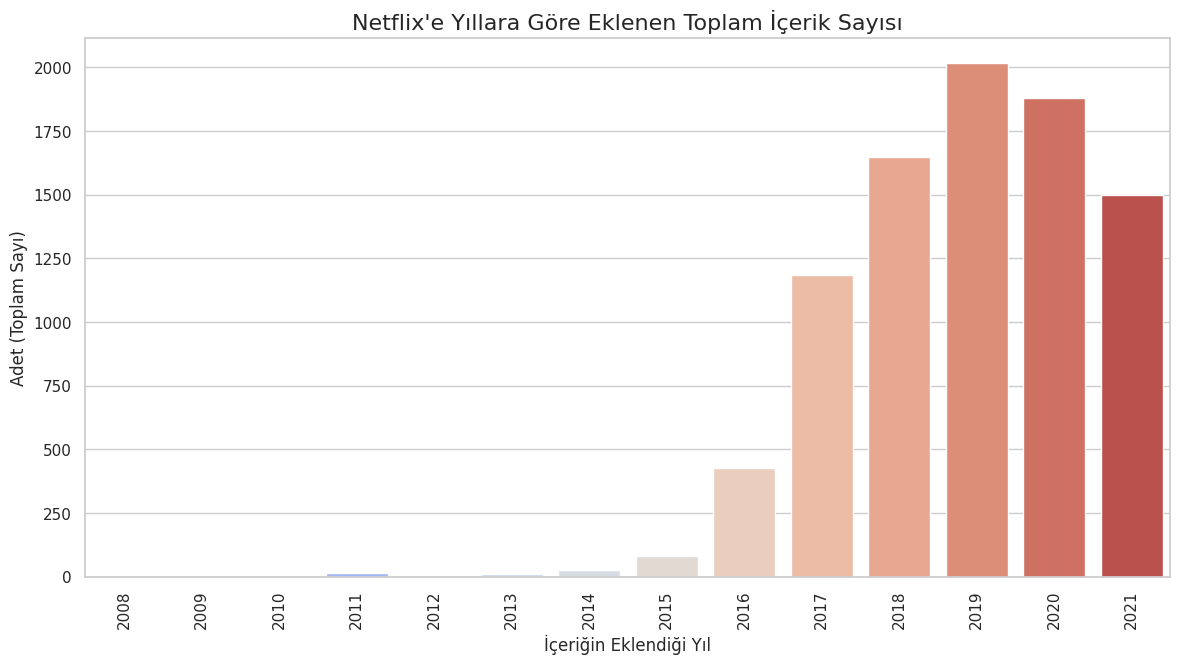

In [13]:
# --- Soru 2: Yıllara Göre Eklenen İçerik ---

# Yıl sayısı fazla olduğu için grafiği geniş tutalım
plt.figure(figsize=(14, 7))

# 'added_year' sütununa göre sayım yap
# order parametresi ile yılları küçükten büyüğe sıralayabiliriz
ax = sns.countplot(data=df, x='added_year', palette='coolwarm')

# Profesyonel dokunuş: Başlık ve etiketler
plt.title('Netflix\'e Yıllara Göre Eklenen Toplam İçerik Sayısı', fontsize=16)
plt.xlabel('İçeriğin Eklendiği Yıl', fontsize=12)
plt.ylabel('Adet (Toplam Sayı)', fontsize=12)

# Profesyonel dokunuş 2: X eksenindeki yıl etiketlerini 90 derece döndürme
# (Birbirine girmesinler diye)
plt.xticks(rotation=90)

# Grafiği göster
plt.show()

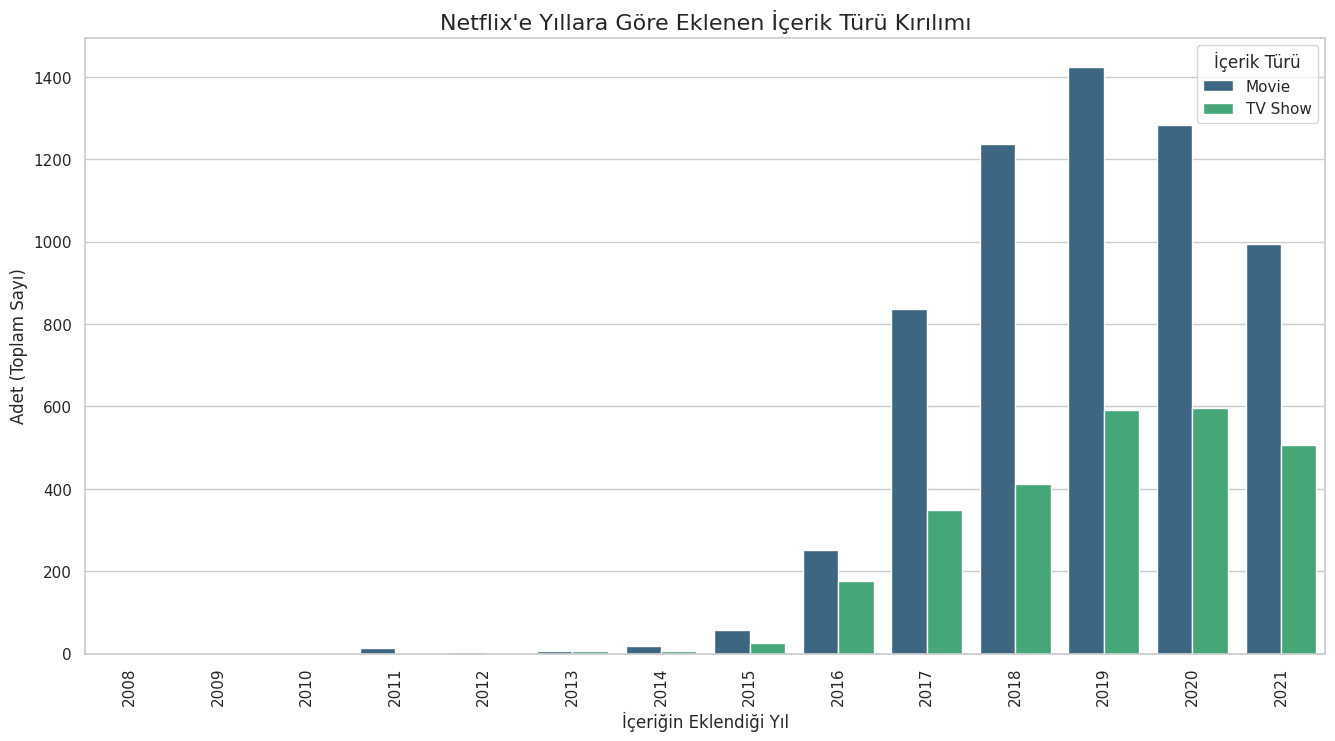

In [14]:
# --- Soru 3: Yıllara Göre İçerik Kırılımı (Film vs Dizi) ---

plt.figure(figsize=(16, 8))

# x='added_year' -> Yıllar X ekseninde
# hue='type'     -> 'type' (Movie/TV Show) sütununa göre barları renklendir/ayır
ax = sns.countplot(data=df, x='added_year', hue='type', palette='viridis')

# Profesyonel dokunuş: Başlık ve etiketler
plt.title('Netflix\'e Yıllara Göre Eklenen İçerik Türü Kırılımı', fontsize=16)
plt.xlabel('İçeriğin Eklendiği Yıl', fontsize=12)
plt.ylabel('Adet (Toplam Sayı)', fontsize=12)
plt.xticks(rotation=90)

# Gösterge (Legend) ekle
plt.legend(title='İçerik Türü')

# Grafiği göster
plt.show()

--- En Popüler 10 İçerik Türü ---
listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


/tmp/ipython-input-253557776.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='mako')


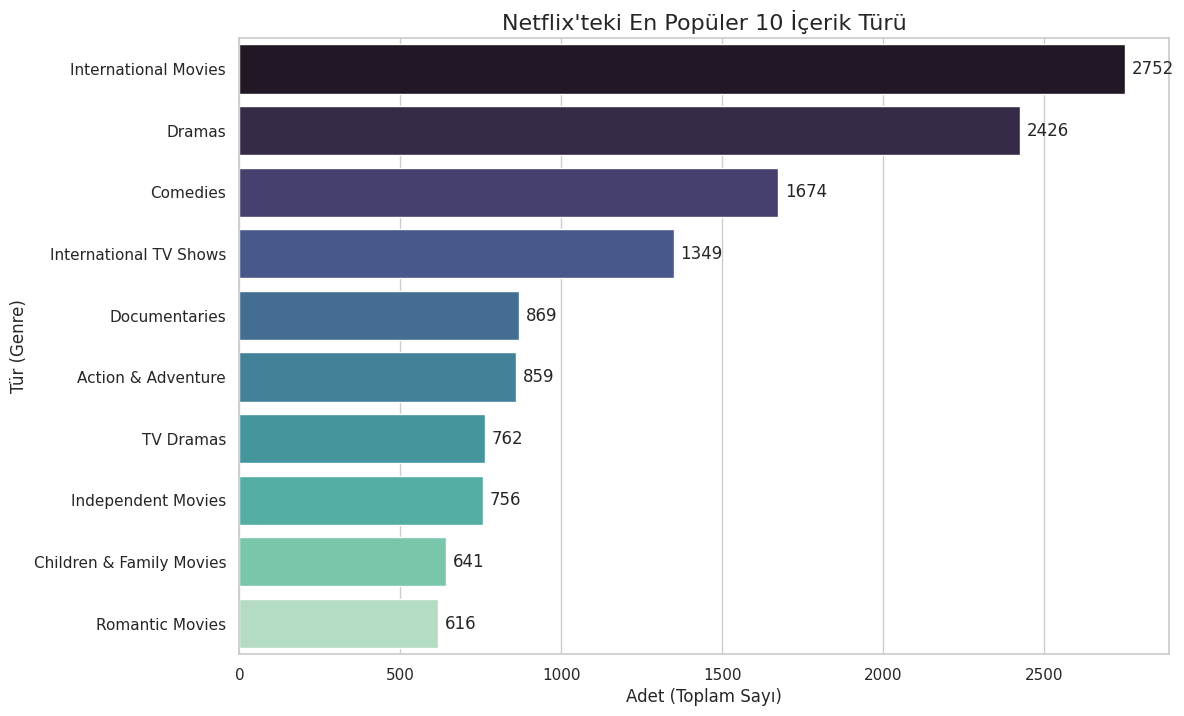

In [15]:
# --- Soru 4: En Popüler 10 İçerik Türü ---

# 1. Adım: Tüm türleri tek bir listeye alacağız.
# Önce "listed_in" sütununu seçelim,
# .str.split(',') ile her satırı virgüllerden ayıralım.
# .explode() fonksiyonu, bu ayrılan listelerdeki her bir elemanı ayrı bir satır yapar.
# .str.strip() ile demin öğrendiğimiz gibi başındaki/sonundaki boşlukları alalım.
genre_counts = df['listed_in'].str.split(',').explode().str.strip()

# 2. Adım: Şimdi bu uzun listedeki her bir türü saydıralım
# .value_counts() fonksiyonu her bir değeri sayar ve en çoktan en aza sıralar.
top_10_genres = genre_counts.value_counts().head(10)

print("--- En Popüler 10 İçerik Türü ---")
print(top_10_genres)

# 3. Adım: Görselleştirme
plt.figure(figsize=(12, 8))

# .head(10) ile en çok olan 10 taneyi seçtik
# .index -> Türlerin isimleri (X ekseni)
# .values -> Sayıları (Y ekseni)
ax = sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='mako')

plt.title('Netflix\'teki En Popüler 10 İçerik Türü', fontsize=16)
plt.xlabel('Adet (Toplam Sayı)', fontsize=12)
plt.ylabel('Tür (Genre)', fontsize=12)

# Profesyonel dokunuş: Barların üzerine sayıları ekleyelim
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.show()

Toplam 6126 adet Film var.
Toplam 2664 adet Dizi var.
✓ 'df_movies' için 'duration_min' adında sayısal bir sütun oluşturuldu.


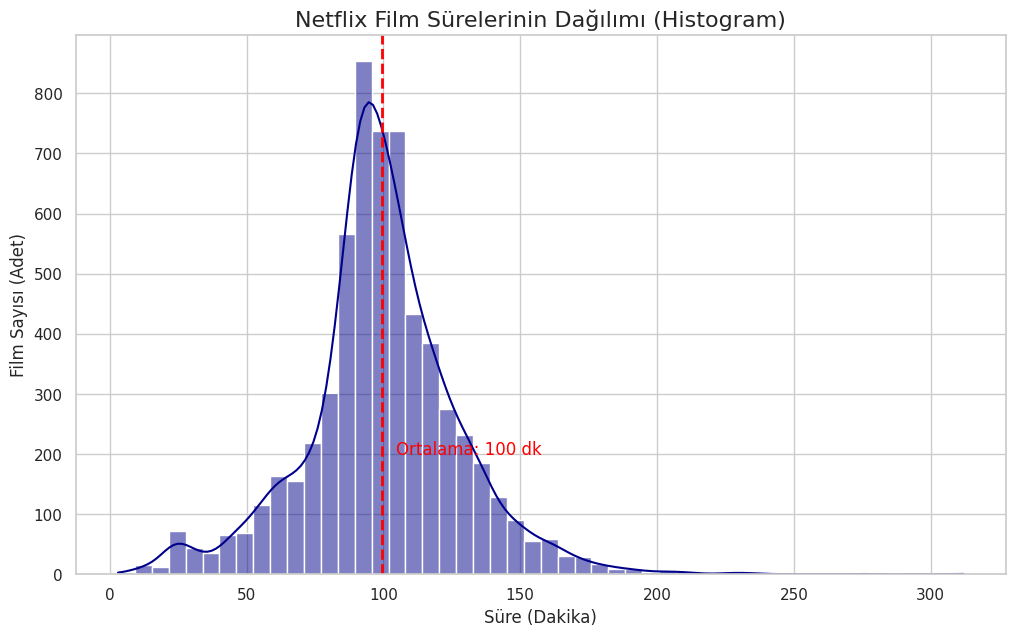


--- Film Süreleri İstatistikleri ---
count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64


In [16]:
# --- Soru 5: Film Sürelerinin Dağılımı ---

# 1. Adım: Veri setini 'Movie' ve 'TV Show' olarak ikiye ayıralım
# df['type'] == 'Movie' koşulunu sağlayan satırları seç ve kopyala
df_movies = df[df['type'] == 'Movie'].copy()
df_tv_shows = df[df['type'] == 'TV Show'].copy()

print(f"Toplam {len(df_movies)} adet Film var.")
print(f"Toplam {len(df_tv_shows)} adet Dizi var.")


# 2. Adım: Film sürelerini temizleme ('duration' sütunu)
# .str.replace(' min', '') -> ' min' metnini sil
# .astype(int) -> Kalan metni (örn: "90") sayıya (int) dönüştür
try:
    df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(int)
    print("✓ 'df_movies' için 'duration_min' adında sayısal bir sütun oluşturuldu.")
except ValueError as e:
    print(f"Hata: Süre dönüştürülürken bir sorun oluştu: {e}")
    print("Muhtemelen ' min' dışında beklenmedik bir metin var.")

# 3. Adım: Görselleştirme - Histogram
# Bir verinin dağılımını görmek için en iyi grafik HİSTOGRAM'dır.
plt.figure(figsize=(12, 7))

# sns.histplot() kullanalım
# kde=True -> Verinin yoğunluk eğrisini de çiz (Dağılımın şeklini daha iyi gösterir)
# bins=50 -> Veriyi 50 farklı çubuğa/aralığa böl
sns.histplot(data=df_movies, x='duration_min', kde=True, bins=50, color='darkblue')

plt.title('Netflix Film Sürelerinin Dağılımı (Histogram)', fontsize=16)
plt.xlabel('Süre (Dakika)', fontsize=12)
plt.ylabel('Film Sayısı (Adet)', fontsize=12)

# Profesyonel dokunuş: Ortalama süreyi grafiğe çizgi olarak ekleyelim
avg_duration = df_movies['duration_min'].mean()
plt.axvline(avg_duration, color='red', linestyle='--', linewidth=2)
plt.text(avg_duration + 5, 200, f'Ortalama: {avg_duration:.0f} dk', color='red')

plt.show()

# İstatistiki özeti de görelim
print("\n--- Film Süreleri İstatistikleri ---")
print(df_movies['duration_min'].describe())

--- En Yaygın Dizi Sezon Sayıları (Top 10) ---
duration
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
Name: count, dtype: int64


/tmp/ipython-input-4070433686.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=season_counts.values, y=season_counts.index, palette='rocket')


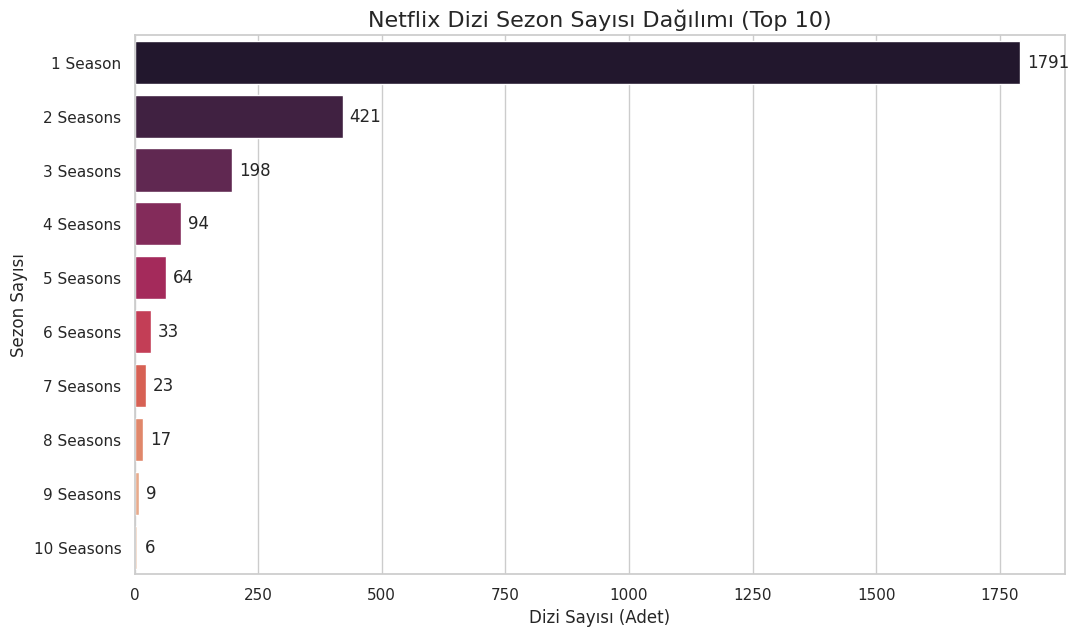

In [17]:
# --- Soru 6: Dizi Sezon Sayısı Dağılımı ---
# (df_tv_shows'u bir önceki adımda zaten oluşturmuştuk)

# 'duration' sütunundaki değerleri sayalım ve en popüler 10 taneyi alalım
# .value_counts() zaten en çoktan en aza doğru sıralar
season_counts = df_tv_shows['duration'].value_counts().head(10)

print("--- En Yaygın Dizi Sezon Sayıları (Top 10) ---")
print(season_counts)

# Görselleştirme
plt.figure(figsize=(12, 7))

# Barplot (Çubuk Grafik)
# y=season_counts.index -> "1 Season", "2 Seasons" vb. (Y ekseni)
# x=season_counts.values -> Sayılar (X ekseni)
# Y ekseninde olması, etiketlerin daha rahat okunmasını sağlar
ax = sns.barplot(x=season_counts.values, y=season_counts.index, palette='rocket')

plt.title('Netflix Dizi Sezon Sayısı Dağılımı (Top 10)', fontsize=16)
plt.xlabel('Dizi Sayısı (Adet)', fontsize=12)
plt.ylabel('Sezon Sayısı', fontsize=12)

# Profesyonel dokunuş: Barların üzerine sayıları ekleyelim
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.show()

--- En Çok İçerik Üreten İlk 15 Ülke ---
country
United States     3681
India             1046
United Kingdom     805
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          158
Egypt              117
Turkey             113
Hong Kong          105
Name: count, dtype: int64


/tmp/ipython-input-2763167176.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_15_countries.values,


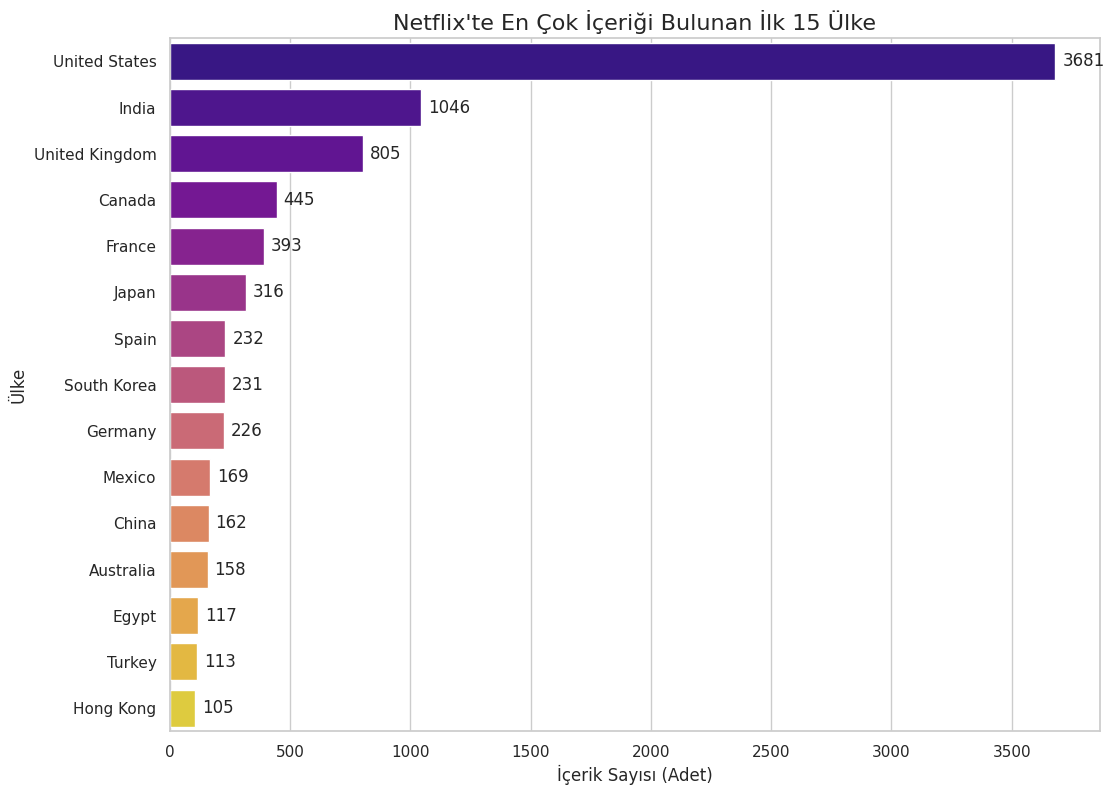

In [18]:
# --- Soru 7: En Çok İçerik Üreten Ülkeler (Top 15) ---

# 1. Adım: 'country' sütununu ayıralım, parçalayalım ve temizleyelim
# (Aşama 4'teki 'listed_in' ile aynı mantık)
country_counts = df['country'].str.split(',').explode().str.strip()

# 2. Adım (KRİTİK): 'Unknown' olarak doldurduğumuz değerleri filtreleyelim
# 'Unknown' olmayanları seç
cleaned_country_counts = country_counts[country_counts != 'Unknown']

# 3. Adım: Sayım yap ve en popüler 15 ülkeyi al
top_15_countries = cleaned_country_counts.value_counts().head(15)

print("--- En Çok İçerik Üreten İlk 15 Ülke ---")
print(top_15_countries)

# 4. Adım: Görselleştirme
plt.figure(figsize=(12, 9))

# Yine 'barplot' kullanıyoruz
ax = sns.barplot(x=top_15_countries.values,
                 y=top_15_countries.index,
                 palette='plasma')

plt.title('Netflix\'te En Çok İçeriği Bulunan İlk 15 Ülke', fontsize=16)
plt.xlabel('İçerik Sayısı (Adet)', fontsize=12)
plt.ylabel('Ülke', fontsize=12)

# Profesyonel dokunuş: Sayıları barların üzerine ekleme
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.show()

--- En Çok İçeriği Bulunan İlk 10 Yönetmen ---
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Name: count, dtype: int64


/tmp/ipython-input-1644683052.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_directors.values,


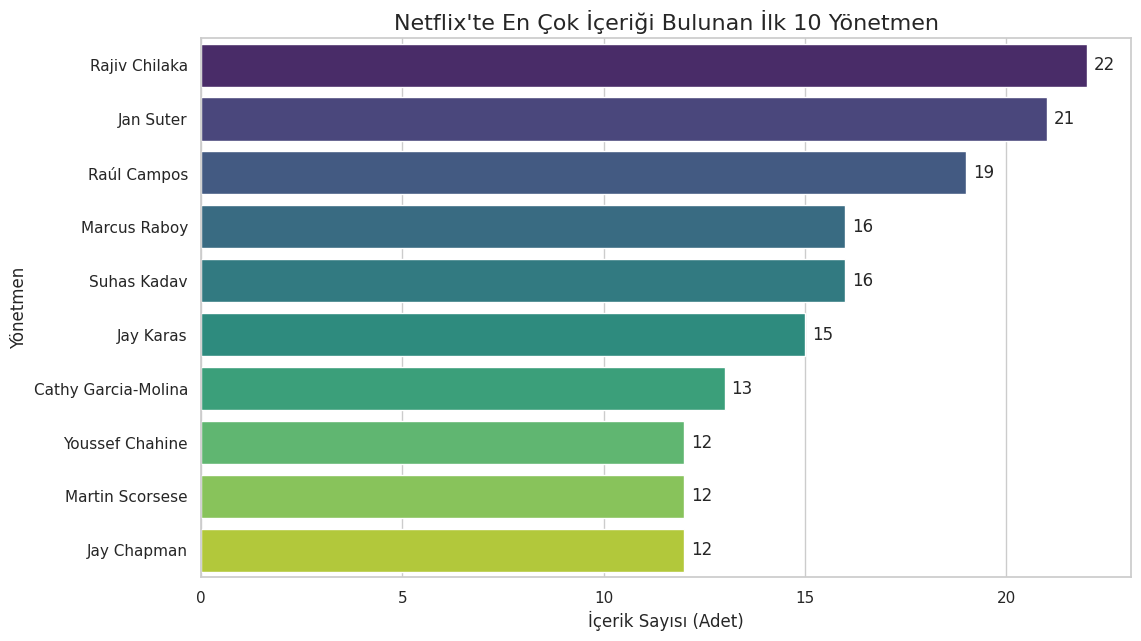

In [19]:
# --- Soru 8: En Üretken Yönetmenler (Top 10) ---

# 1. Adım: 'director' sütununu ayıralım, parçalayalım ve temizleyelim
director_counts = df['director'].str.split(',').explode().str.strip()

# 2. Adım (KRİTİK): 'Unknown' olarak doldurduğumuz değerleri filtreleyelim
cleaned_director_counts = director_counts[director_counts != 'Unknown']

# 3. Adım: Sayım yap ve en popüler 10 yönetmeni al
top_10_directors = cleaned_director_counts.value_counts().head(10)

print("--- En Çok İçeriği Bulunan İlk 10 Yönetmen ---")
print(top_10_directors)

# 4. Adım: Görselleştirme
plt.figure(figsize=(12, 7))

# Barplot
ax = sns.barplot(x=top_10_directors.values,
                 y=top_10_directors.index,
                 palette='viridis')

plt.title('Netflix\'te En Çok İçeriği Bulunan İlk 10 Yönetmen', fontsize=16)
plt.xlabel('İçerik Sayısı (Adet)', fontsize=12)
plt.ylabel('Yönetmen', fontsize=12)

# Profesyonel dokunuş: Sayıları barların üzerine ekleme
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

plt.show()